<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/Read_in_Polarstern_CTD_data_from_Pangaea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in & Plot CTD data measured during a Polarstern cruise, taken from Pangaea

This article can also be viewed and interacted with in Google Colab.

Comment the following cell out, if you don't run this notebook on Google Colab. 

In [ ]:
!pip install gsw
#INSTALL CARTOPY

## Import necessary packages

In [ ]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":  "white",  
    "savefig.facecolor": "white",  
    "figure.figsize": [8,6]
})
import gsw #Gibbs Seawater Toolbox https://github.com/TEOS-10/GSW-Python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download CTD data from Pangaea

This data is from the Polarstern expedition PS107 and can be found here https://doi.pangaea.de/10.1594/PANGAEA.881076.

In [ ]:
url= "https://doi.pangaea.de/10.1594/PANGAEA.881076?format=textfile"
data = pd.read_csv(url, delimiter = "\t", skiprows=78)
data

,Event,Date/Time,Latitude,Longitude,Elevation [m],Depth water [m],Press [dbar],Temp [°C],Cond [mS/cm],Sal,Tpot [°C],Sigma-theta [kg/m**3],O2 [µmol/l],O2 sat [%],Attenuation [arbitrary units],Fluorometer [arbitrary units],NOBS [#]
0,PS103_1-1,2016-12-20T13:22,-45.9549,6.2873,NaN,5.0,5,5.2788,32.6967,33.8338,5.2784,26.7185,334.377,105.52,75.54,0.38,8
1,PS103_1-1,2016-12-20T13:22,-45.9549,6.2873,NaN,6.0,6,5.2876,32.7052,33.8342,5.2871,26.7178,334.089,105.45,87.20,0.38,16
2,PS103_1-1,2016-12-20T13:22,-45.9549,6.2873,NaN,6.9,7,5.2860,32.7040,33.8339,5.2855,26.7178,334.242,105.49,88.10,0.39,14
3,PS103_1-1,2016-12-20T13:22,-45.9549,6.2873,NaN,7.9,8,5.2472,32.6700,33.8336,5.2466,26.7221,334.715,105.54,88.07,0.44,12
4,PS103_1-1,2016-12-20T13:22,-45.9549,6.2873,NaN,8.9,9,5.2497,32.6728,33.8338,5.2490,26.7220,334.284,105.41,88.02,0.49,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135593,PS103_73-1,2017-01-30T14:15,-58.4732,-59.6448,-3772.0,302.9,306,1.5835,30.1951,34.5473,1.5679,27.6419,196.284,56.77,91.69,-0.02,18
135594,PS103_73-1,2017-01-30T14:15,-58.4732,-59.6448,-3772.0,303.9,307,1.5920,30.2044,34.5493,1.5763,27.6429,195.932,56.68,91.68,-0.02,14
135595,PS103_73-1,2017-01-30T14:15,-58.4732,-59.6448,-3772.0,304.9,308,1.6089,30.2229,34.5536,1.5931,27.6451,195.908,56.70,91.69,-0.02,18
135596,PS103_73-1,2017-01-30T14:15,-58.4732,-59.6448,-3772.0,305.9,309,1.6477,30.2622,34.5601,1.6318,27.6475,195.515,56.64,91.70,-0.02,21


### Keep only necessary columns

In [ ]:
profile = profile[['Event', 'Latitude', 'Longitude', 'Depth water [m]', 'Press [dbar]', 'Temp [°C]', 'Sal']]
profile

## Variable conversions

* _Sal_ is Potential Salinity in the Pseudounit PSU
* _Temp [°C]_ the in-situ temperature in ITS-90

All conversions are done with the python version of the Gibbs Seawater toolbox [GSW-Python](https://github.com/TEOS-10/GSW-Python)

In [ ]:
profile["Absolute Salinity"] = gsw.SA_from_SP(
    SP=profile["Sal"], p=profile["Press [dbar]"], lon=profile["Longitude"], lat=profile["Latitude"]
)
profile["Conservative Temperature"] = gsw.CT_from_t(
    SA=profile["Absolute Salinity"], t=profile["Temp [°C]"], p=profile["Press [dbar]"]
)

profile.head()

,Event,Latitude,Longitude,Depth water [m],Press [dbar],Temp [°C],Sal,Absolute Salinity,Conservative Temperature
0,PS103_51-1,-63.8924,-49.0801,5.0,5,0.0302,33.5496,33.713413,0.036182
1,PS103_51-1,-63.8924,-49.0801,5.9,6,0.0291,33.5496,33.713404,0.035048
2,PS103_51-1,-63.8924,-49.0801,6.9,7,0.0269,33.5496,33.713395,0.032813
3,PS103_51-1,-63.8924,-49.0801,7.9,8,0.0294,33.5496,33.713387,0.035282
4,PS103_51-1,-63.8924,-49.0801,8.9,9,0.0317,33.5495,33.713278,0.037552


### Group data by event/profile name

In [ ]:
grouped_data = data.groupby("Event")
events = grouped_data.groups.keys()
print(f"Number of Events/Casts = {len(events)}")
profile = grouped_data.get_group("PS103_51-1").reset_index(drop = True)

Number of Events/Casts = 51


### Calculate potential density $\rho_{\text{pot}}$ anomaly $\sigma$

The potential density $\rho_{\text{pot}}$ ????????????????????????????????????????????

Density anomaly $\sigma$ is then defined as $\rho_{\text{pot}} - 1000\,\text{kg/m}^3$.

The documentation to the following functions can be found [here]. The numbers $0$ to $4$ in the function calls or subscripts refer to the reference pressure, $0$ to $0$ bar, $1$ to $1000\,$bar and so on. 

[here]: https://teos-10.github.io/GSW-Python/density.html

In [ ]:
profile["Sigma0"] = gsw.density.sigma0(SA=profile["Absolute Salinity"], CT=profile["Conservative Temperature"])
profile["Sigma1"] = gsw.density.sigma1(SA=profile["Absolute Salinity"], CT=profile["Conservative Temperature"])
profile["Sigma2"] = gsw.density.sigma2(SA=profile["Absolute Salinity"], CT=profile["Conservative Temperature"])
profile["Sigma3"] = gsw.density.sigma3(SA=profile["Absolute Salinity"], CT=profile["Conservative Temperature"])
profile["Sigma4"] = gsw.density.sigma4(SA=profile["Absolute Salinity"], CT=profile["Conservative Temperature"])
profile.head()

,Event,Latitude,Longitude,Depth water [m],Press [dbar],Temp [°C],Sal,Absolute Salinity,Conservative Temperature,Sigma0,Sigma1,Sigma2,Sigma3,Sigma4
0,PS103_51-1,-63.8924,-49.0801,5.0,5,0.0302,33.5496,33.713413,0.036182,26.940083,31.661310,36.276373,40.786331,45.192533
1,PS103_51-1,-63.8924,-49.0801,5.9,6,0.0291,33.5496,33.713404,0.035048,26.940133,31.661394,36.276491,40.786481,45.192713
2,PS103_51-1,-63.8924,-49.0801,6.9,7,0.0269,33.5496,33.713395,0.032813,26.940238,31.661567,36.276729,40.786783,45.193076
3,PS103_51-1,-63.8924,-49.0801,7.9,8,0.0294,33.5496,33.713387,0.035282,26.940107,31.661361,36.276451,40.786435,45.192661
4,PS103_51-1,-63.8924,-49.0801,8.9,9,0.0317,33.5495,33.713278,0.037552,26.939905,31.661092,36.276117,40.786037,45.192202


## Plotting single profiles

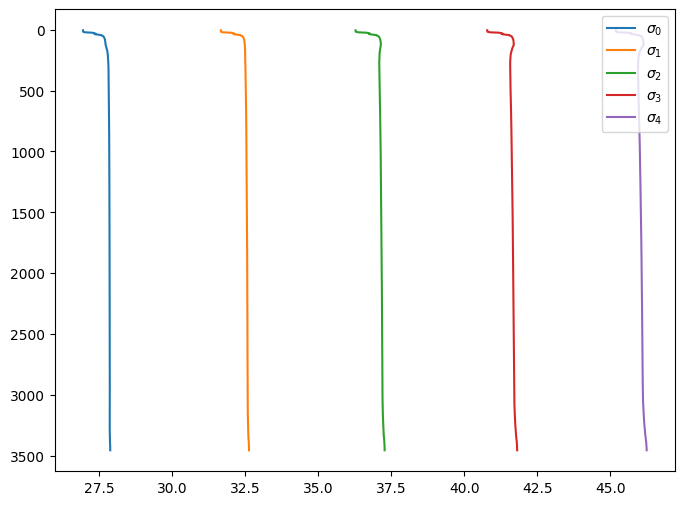

In [ ]:
f, ax = plt.subplots()
for i in range(5):
    ax.plot(profile[f"Sigma{i}"], profile["Depth water [m]"], label = f"$\sigma_{i}$")
ax.legend()
ax.invert_yaxis()

We see, choosing the reference pressure definitely changes the mean density of each new profile.

But if we lay all the potential density anomaly profiles on top of each other, we see also differences in the profile shape.

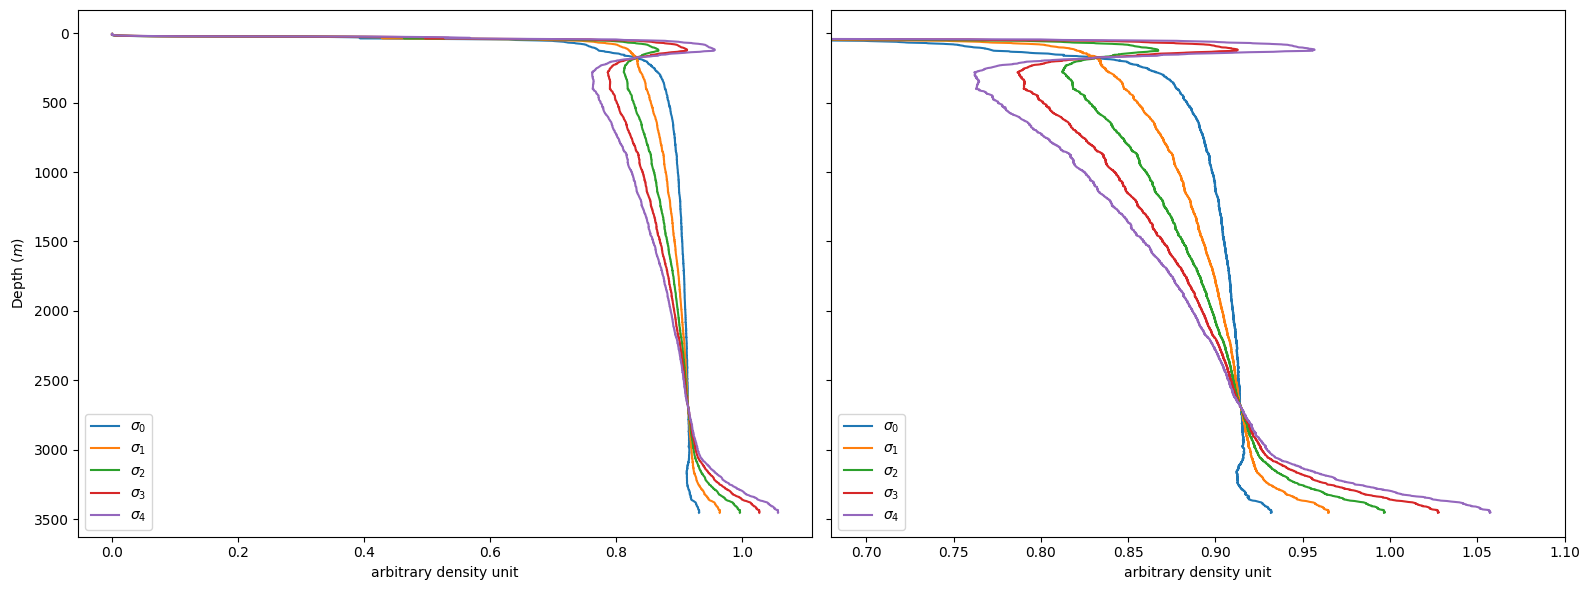

In [ ]:
f, axis = plt.subplots(ncols = 2, sharey = True, figsize=(16, 6))
for ax in axis:
    for i in range(5):
        ax.plot(
            profile[f"Sigma{i}"]-profile[f"Sigma{i}"].iloc[0], 
            profile["Depth water [m]"], 
            label = f"$\sigma_{i}$",
            )
    ax.legend(loc = "lower left")
axis[1].set_xlim(0.68,1.1)
axis[0].invert_yaxis()
for ax in axis:
    ax.set_xlabel("arbitrary density unit")
axis[0].set_ylabel("Depth ($m$)")
f.tight_layout()

DESCRIPTION ???????????????????????????????????????

## Plot map of the CTD profiles

## Plot transect from a subset of CTD profiles